In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [2]:
# 📁 Load dataset from folders
def load_images_from_folder(folder_path, image_size=(48, 48), grayscale=True):
    images = []
    labels = []

    for class_label in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_label)
        if not os.path.isdir(class_path):
            continue

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if grayscale:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            else:
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)

            if img is None:
                print(f"Skipping: {img_path}")
                continue

            img_resized = cv2.resize(img, image_size)
            images.append(img_resized)
            labels.append(class_label)

    return np.array(images), np.array(labels)

In [3]:
X, y = load_images_from_folder(r'C:\Users\ANUPAM MANDAL\OneDrive\Documents\major_pro\Final_Dataset', image_size=(48, 48))
print(f"✅ Loaded {len(X)} images from dataset with {len(np.unique(y))} emotion classes.")

✅ Loaded 6379 images from dataset with 5 emotion classes.


In [4]:
X = X.astype('float32') / 255.0
X = X.reshape(-1, 48, 48, 1)

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [8]:
def create_cnn(input_shape=(48, 48, 1), num_classes=5):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
cnn_model = create_cnn(input_shape=(48, 48, 1), num_classes=len(np.unique(y)))
cnn_model.summary()

d:\major\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,589 (1.36 MB)

 Trainable params: 355,589 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = cnn_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.2234 - loss: 1.5982 - val_accuracy: 0.2723 - val_loss: 1.5849
Epoch 2/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2648 - loss: 1.5557 - val_accuracy: 0.3095 - val_loss: 1.5582
Epoch 3/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3188 - loss: 1.5145 - val_accuracy: 0.3467 - val_loss: 1.4903
Epoch 4/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3374 - loss: 1.4880 - val_accuracy: 0.3849 - val_loss: 1.4499
Epoch 5/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3914 - loss: 1.4265 - val_accuracy: 0.4084 - val_loss: 1.4207
Epoch 6/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4127 - loss: 1.3788 - val_accuracy: 0.4251 - val_loss: 1.3692
Epoch 7/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4450 - loss: 1.3547 - val_accuracy: 0.4985 - val_loss: 1.2683
Epoch 8/60
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4611 - loss: 1.2997 - val_accu

In [11]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8635 - loss: 0.4756

✅ Test Accuracy: 85.58%


In [12]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [13]:
class_names = label_encoder.classes_

In [14]:
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("📊 Classification Report:\n")
print(report)

📊 Classification Report:

                 precision    recall  f1-score   support

    Angry faces       0.88      0.91      0.89       316
    Happy faces       0.88      0.85      0.86       260
   Normal faces       0.86      0.87      0.87       271
      Sad faces       0.77      0.76      0.76       129
Surprised faces       0.84      0.83      0.84       300

       accuracy                           0.86      1276
      macro avg       0.85      0.84      0.84      1276
   weighted avg       0.86      0.86      0.86      1276



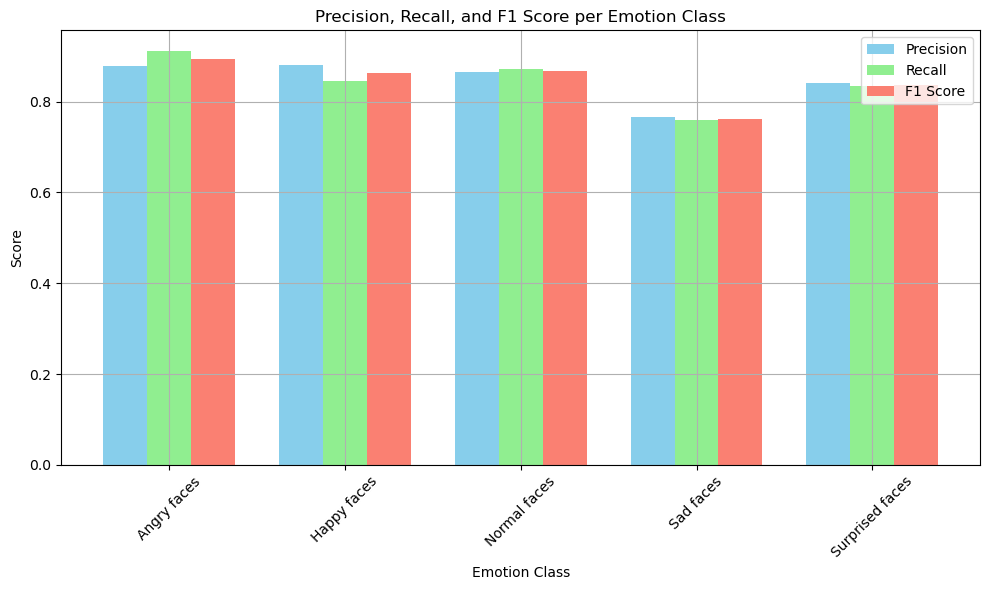

In [15]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_classes, zero_division=0)
x = np.arange(len(class_names))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.25, precision, width=0.25, label='Precision', color='skyblue')
plt.bar(x, recall, width=0.25, label='Recall', color='lightgreen')
plt.bar(x + 0.25, f1_score, width=0.25, label='F1 Score', color='salmon')

plt.xticks(x, class_names, rotation=45)
plt.xlabel('Emotion Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score per Emotion Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

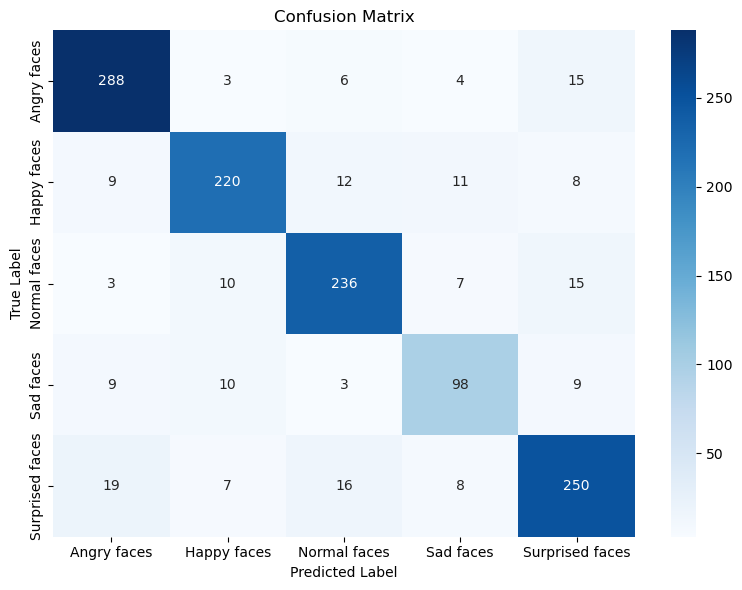

In [16]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

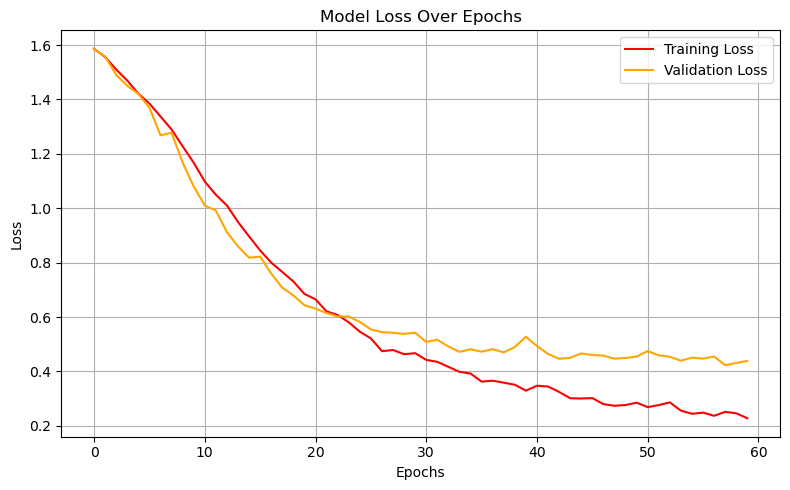

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

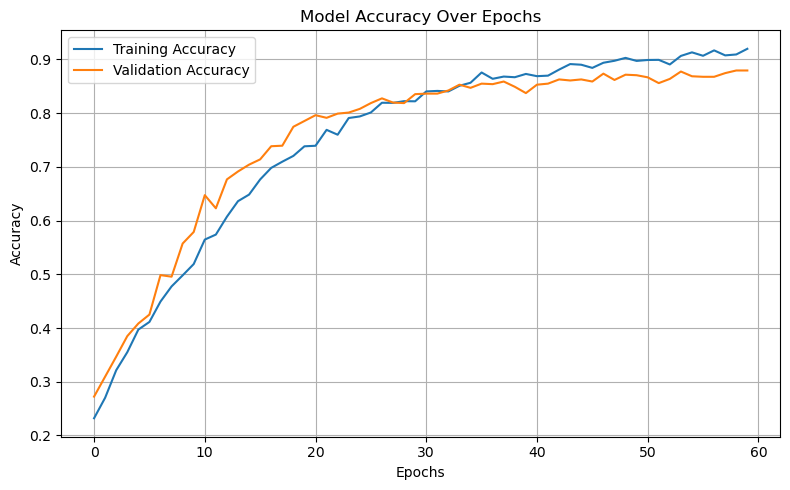

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
def predict_emotion(model, image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_color = cv2.imread(image_path)

    if img_gray is None or img_color is None:
        print("❌ Error: Image not found or unreadable.")
        return

    img_resized = cv2.resize(img_gray, (48, 48)) / 255.0
    img_reshaped = img_resized.reshape(1, 48, 48, 1)

    prediction = model.predict(img_reshaped)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    img_color_resized = cv2.resize(img_color, (200, 200))
    img_rgb = cv2.cvtColor(img_color_resized, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4, 4))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Emotion: {predicted_label}", fontsize=14, color='green')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


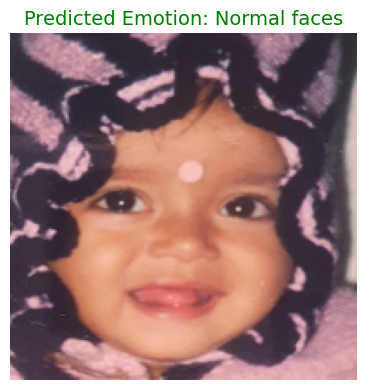

🧠 Predicted Emotion: Normal faces


In [20]:
test_image_path = r'C:\Users\ANUPAM MANDAL\OneDrive\Documents\major_pro\images\60.jpg'
predicted_emotion = predict_emotion(cnn_model, test_image_path)
print(f"🧠 Predicted Emotion: {predicted_emotion}")